## **Predicting the Quarterly Gross Profit for Walmart**



In [1]:
# Importing Packages
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import sklearn.preprocessing
from sklearn.metrics import r2_score
import keras

from keras.layers import Dense,Dropout,SimpleRNN,GRU, Bidirectional,LSTM
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [7]:
# Reading the Data
df=pd.read_excel('Walmart Quarterly Gross Profit.xlsx')
df.head()

,Date,Quartely Gross Profit
0,2009-01-31,26797
1,2009-04-30,23854
2,2009-07-31,25820
3,2009-10-31,25458
4,2010-01-31,28847


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   56 non-null     datetime64[ns]
 1   Quartely Gross Profit  56 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB


In [9]:
# Setting Date as Index
df = df.set_index('Date')
df.head()

,Quartely Gross Profit
Date,
2009-01-31,26797
2009-04-30,23854
2009-07-31,25820
2009-10-31,25458
2010-01-31,28847


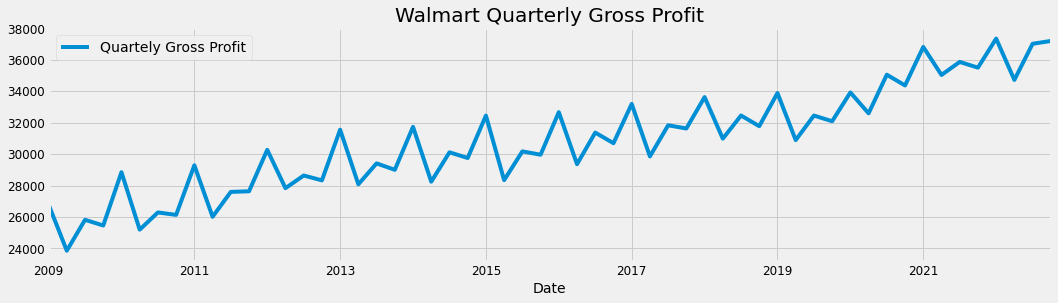

In [10]:
# Plotting the data
df.plot(figsize=(16,4),legend=True)
plt.title('Walmart Quarterly Gross Profit')
plt.show()

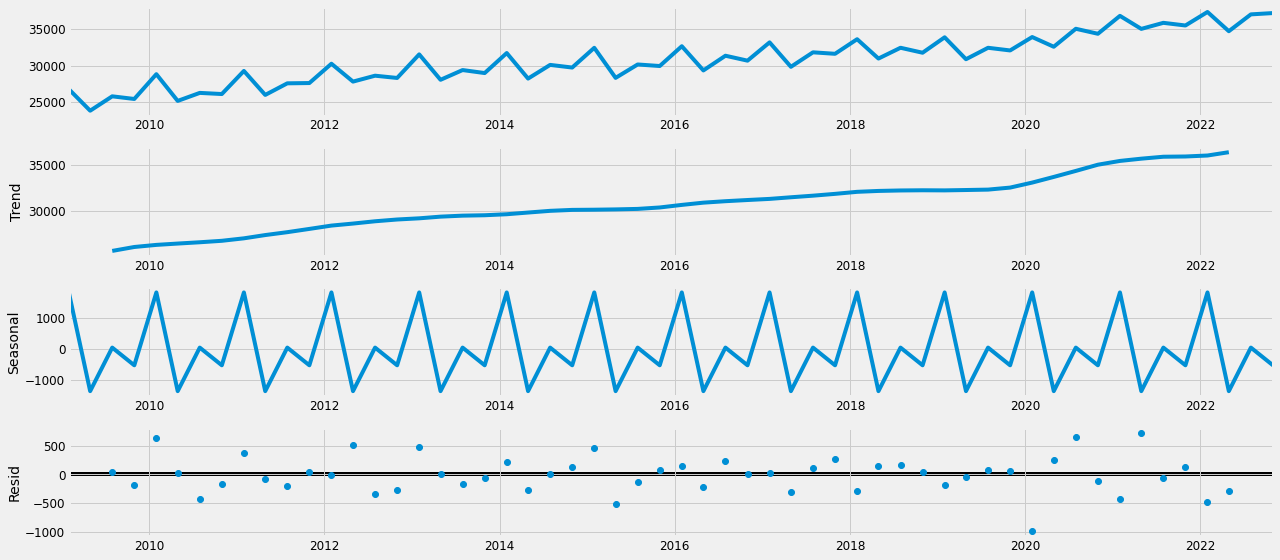

In [11]:
# Decomposition the data 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df, model = 'additive')
fig = decomposition.plot()
plt.show()

In [13]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.3 MB/s 
     |████████████████████████████████| 9.9 MB 52.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


<ipython-input-18-53ca2ab34e47>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Quartely Gross Profit']
<ipython-input-18-53ca2ab34e47>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['Quartely Gross Profit']


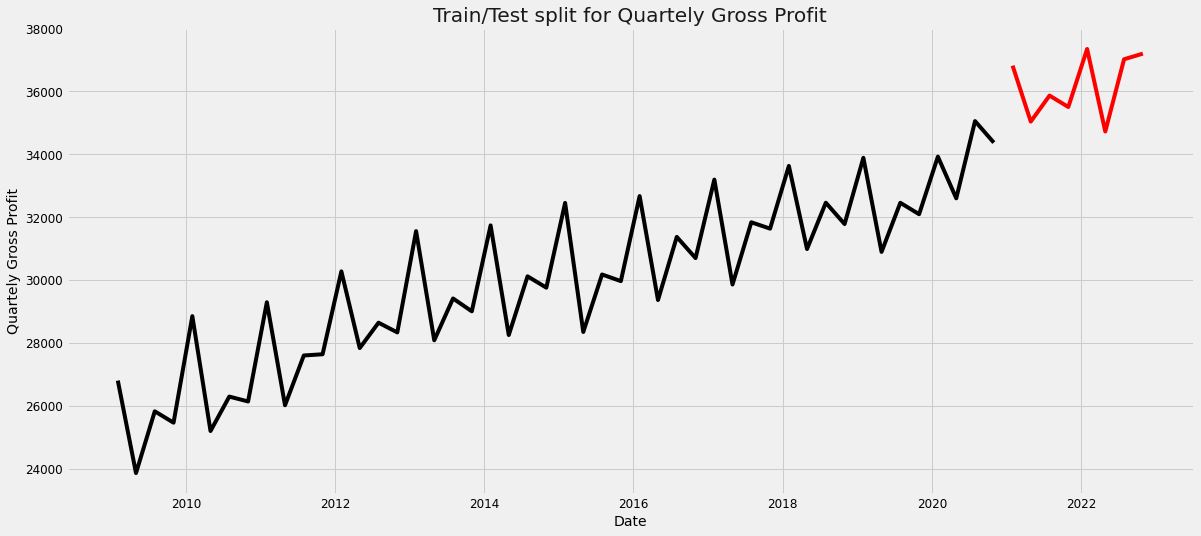

In [18]:
# Dividing the data into training and testing
# Ploting the data
import seaborn as sns 
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("2020-12", format='%Y-%m')]
train['train'] = train['Quartely Gross Profit']
del train['Date']
del train['Quartely Gross Profit']
test = df[df['Date'] >= pd.to_datetime("2020-12", format='%Y-%m')]
del test['Date']
test['test'] = test['Quartely Gross Profit']
del test['Quartely Gross Profit']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Quartely Gross Profit")
plt.ylabel("Quartely Gross Profit")
plt.xlabel('Date')
sns.set()
plt.show()

In [19]:
# Applying ARIMA Model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=804.349, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=862.330, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=844.558, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=846.847, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=860.584, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=805.513, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=792.556, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=790.184, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=838.276, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=776.234, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=778.402, Time=0.32 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=771.630, Time=0.37 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=776.029, Time=0.11 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=766.964, 

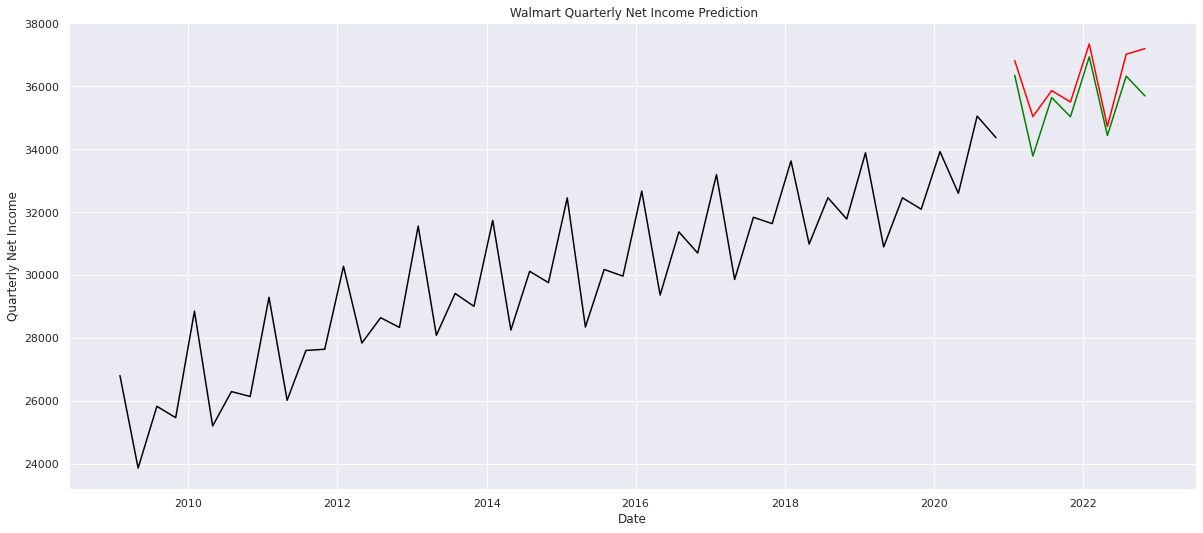

In [20]:
# Plotting the prediction
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "green")
plt.title(" Walmart Quarterly Net Income Prediction")
plt.ylabel("Quarterly Net Income")
plt.xlabel('Date')
sns.set()
plt.show()

In [21]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  795.3660204459867


## SARIMA Model

In [ ]:
df=pd.read_excel('Walmart Quarterly Gross Profit.xlsx')
df = df.set_index('Date')

In [ ]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1319.260809022218
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1299.3606413938437


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:820.0551378628968


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequenc

SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1930.8064037209836
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1181.1204498047864


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information wa

SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1109.077905218272
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:800.5214875793596


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information wa

SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1953.2935546456542
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1285.839981883789
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1282.1580295883828
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:803.645612838685


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimizatio

SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1902.6477089866214
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1279.597078921333
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1281.3030221734361


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:798.8464672780563


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information wa

SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1611.3947413426101
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1003.7420200638525
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:987.7886181245652
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:681.1452656986746


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information wa

SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1927.1799523594816
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:976.2933179916159
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:971.2685984924686
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:682.0629617857975


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1689.9278586273247
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:987.6305203734522


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:973.2142271609505
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:680.4868209812795


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimizatio

SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1754.4702854840878
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:971.1869441931206
SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:968.1530495421314
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:682.1938143505695


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimizatio

SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1980.557352336927
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1029.2762702577338
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:991.8872663193276
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:790.4350174287244


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimizatio

SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1928.580832346697


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:931.5381063534696


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:925.8107232542161
SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:785.9958008795865


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information wa

SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1759.8903503305485


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:997.7628019471249


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:965.9313445684893


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:782.440288411889


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1852.7514031236958


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:923.2890027453628
SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:994.6474088140696


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:787.7299872937468


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1942.7696759715575
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:982.1937798881404


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:967.6986120168145
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:679.9199441500693


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimizatio

SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2016.575625424281
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:962.2771738223256


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information wa

SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:951.43189204871
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:681.7864680663506


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1950.9967812652062


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:938.1358479289341


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information wa

SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:996.3270482445645
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:680.9297601946279


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1850.3645951622027
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:938.8657665644558


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information wa

SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:938.7244278491319
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:682.8221859824413


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10.0


In [ ]:
#Fitting the SARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(df, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6932      0.576     -1.202      0.229      -1.823       0.437
ma.L1          0.5590      0.672      0.832      0.406      -0.758       1.876
ar.S.L12      -0.0334      0.162     -0.206      0.837      -0.351       0.284
sigma2      3.845e+05   7.61e+04      5.051      0.000    2.35e+05    5.34e+05


In [ ]:
prediction = result.get_prediction(start = pd.to_datetime('2021-04-30'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Quartely Gross Profit,upper Quartely Gross Profit
2021-04-30,32857.872160,35288.511639
2021-07-31,35215.102362,37645.741841
2021-10-31,34126.986510,36557.625989
2022-01-31,36295.730420,38726.369899
2022-04-30,33232.407619,35663.047098
2022-07-31,34975.561730,37406.201209
2022-10-31,35396.471258,37827.110737


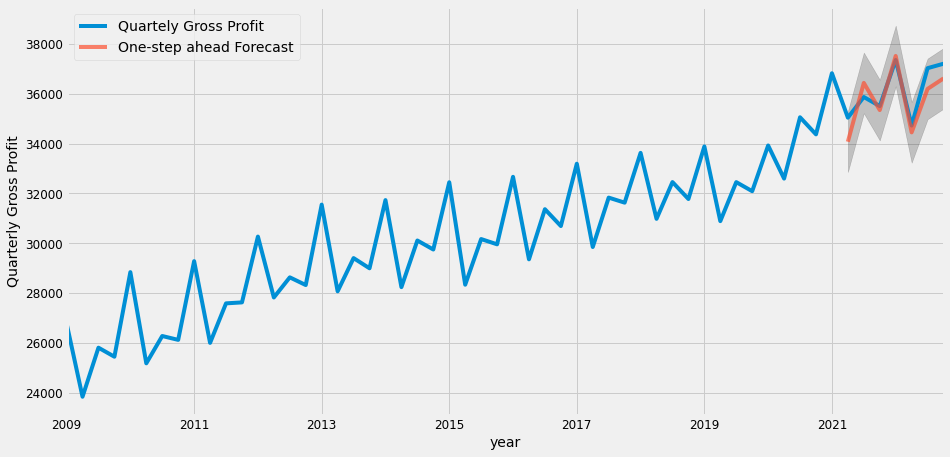

In [ ]:
#Visualize the forecasting
ax = df['2009':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("year")
ax.set_ylabel('Quarterly Gross Profit')
plt.legend()
plt.show()

In [ ]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)

from sklearn.metrics import mean_squared_error

y_hat = prediction.predicted_mean
y_truth = df['2021-03-31':]
mse = mean_squared_error(y_truth,y_hat)
rmse = np.sqrt(mse)

print('The Mean Squared Error of our forecasts is', mse)
print('The Root Mean Squared Error of our forecasts is', rmse)

The Mean Squared Error of our forecasts is 344661.6083567878
The Root Mean Squared Error of our forecasts is 587.0788774575251


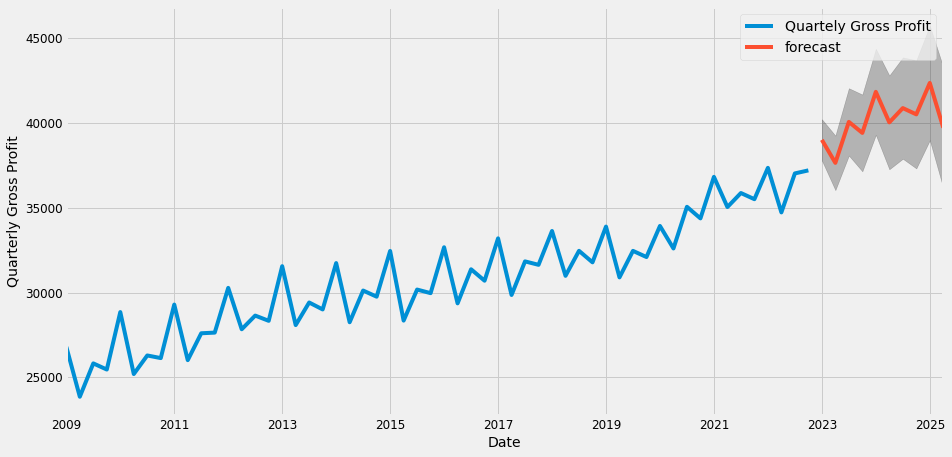

In [ ]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 10)
pred_ci = pred_uc.conf_int()

ax = df.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Quarterly Gross Profit')

plt.legend()
plt.show()


## **DNN MODEL**

In [ ]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,0])
        Y.append(data_arr[d,0])
    return np.array(X).astype('int'), np.array(Y).astype('int')

In [ ]:
df=pd.read_excel('Walmart Quarterly Gross Profit.xlsx')

df = df.set_index('Date')


In [ ]:
df1 = df
#Split data set into testing dataset and train dataset
train_size = 49
train, test =df1.values[0:train_size,:],df1.values[train_size:len(df1.values),:]
# setup look_back window 
look_back = 4
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [ ]:
model=model_dnn(look_back)
history=model.fit(trainX,trainY, epochs=500, batch_size=4, verbose=1, validation_data=(testX,testY),shuffle=False)

Epoch 1/500
12/12 [==============================] - 1s 28ms/step - loss: 733065728.0000 - mse: 733065728.0000 - mae: 27035.9141 - val_loss: 674150592.0000 - val_mse: 674150592.0000 - val_mae: 25941.2969
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 326192384.0000 - mse: 326192384.0000 - mae: 17984.2949 - val_loss: 241177600.0000 - val_mse: 241177600.0000 - val_mae: 15491.7451
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 97188968.0000 - mse: 97188968.0000 - mae: 9684.1953 - val_loss: 42310372.0000 - val_mse: 42310372.0000 - val_mae: 6414.0586
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 12307298.0000 - mse: 12307298.0000 - mae: 3051.8325 - val_loss: 1188411.6250 - val_mse: 1188411.6250 - val_mae: 1065.2422
Epoch 5/500
12/12 [==============================] - 0s 6ms/step - loss: 2697772.5000 - mse: 2697772.5000 - mae: 1361.0554 - val_loss: 6140484.0000 - val_mse: 6140484.0000 - val_mae: 2232.1941
Epoch 6/

In [ ]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

In [ ]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print(train_score)
print(test_score)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))

Train Root Mean Squared Error(RMSE): 726.05; Train Mean Absolute Error(MAE) : 558.04 
[527151.25, 527151.25, 558.036865234375]
[1088594.875, 1088594.875, 936.0260620117188]
Test Root Mean Squared Error(RMSE): 1043.36; Test Mean Absolute Error(MAE) : 936.03 


In [ ]:
 def prediction_plot(testY, test_predict):
      len_prediction=[x for x in range(len(testY))]
      plt.figure(figsize=(8,4))
      plt.plot(len_prediction, testY[:8], marker='.', label="actual")
      plt.plot(len_prediction, test_predict[:8], 'r', label="prediction")
      plt.tight_layout()
      #sns.despine(top=True)
      plt.subplots_adjust(left=0.07)
      plt.ylabel('Ads Daily Spend', size=15)
      plt.xlabel('Time step', size=15)
      plt.legend(fontsize=15)
      plt.show();

1/1 [==============================] - 0s 20ms/step


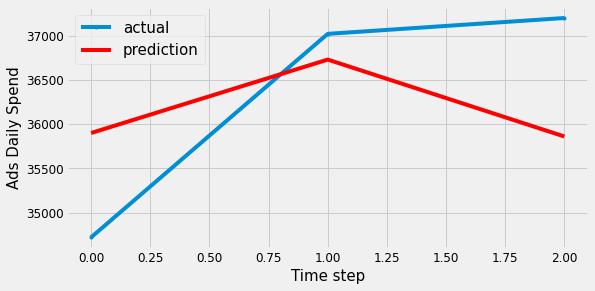

In [ ]:
test_predict = model.predict(testX)
prediction_plot(testY, test_predict)

## **GRU and BiLSTM Models** 

In [ ]:
df=pd.read_excel('Walmart Quarterly Gross Profit.xlsx')
df.head()

,Date,Quartely Gross Profit
0,2009-01-31,26797
1,2009-04-30,23854
2,2009-07-31,25820
3,2009-10-31,25458
4,2010-01-31,28847


In [ ]:
df = df.set_index('Date')
df.head()

,Quartely Gross Profit
Date,
2009-01-31,26797
2009-04-30,23854
2009-07-31,25820
2009-10-31,25458
2010-01-31,28847


In [ ]:
# Split train data and test data
train_size = int(len(df)*0.8)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [ ]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [ ]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 4
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (40, 4, 1)
y_train.shape:  (40, 1)
X_test.shape:  (8, 4, 1)
y_test.shape:  (8, 1)


In [ ]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_bilstm = create_bilstm(64)
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [ ]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
2/2 [==============================] - 4s 849ms/step - loss: 0.3370 - val_loss: 0.5017
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 0.2054 - val_loss: 0.2937
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 0.1062 - val_loss: 0.1415
Epoch 4/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0464 - val_loss: 0.0476
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0234 - val_loss: 0.0122
Epoch 6/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0334 - val_loss: 0.0186
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0495 - val_loss: 0.0294
Epoch 8/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0520 - val_loss: 0.0254
Epoch 9/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0431 - val_loss: 0.0162
Epoch 10/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0306 - val_loss: 0.0115
Epoch 11/100
2/2 [

In [ ]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
2/2 [==============================] - 9s 2s/step - loss: 0.3242 - val_loss: 0.5467
Epoch 2/100
2/2 [==============================] - 0s 38ms/step - loss: 0.2366 - val_loss: 0.3836
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 0.1606 - val_loss: 0.2384
Epoch 4/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0950 - val_loss: 0.1166
Epoch 5/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0446 - val_loss: 0.0340
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0190 - val_loss: 0.0122
Epoch 7/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0260 - val_loss: 0.0407
Epoch 8/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0457 - val_loss: 0.0538
Epoch 9/100
2/2 [==============================] - 0s 70ms/step - loss: 0.0467 - val_loss: 0.0353
Epoch 10/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0334 - val_loss: 0.0158
Epoch 11/100
2/2 [===

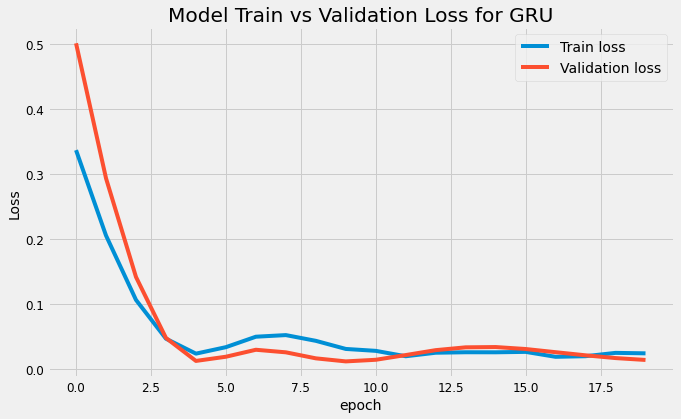

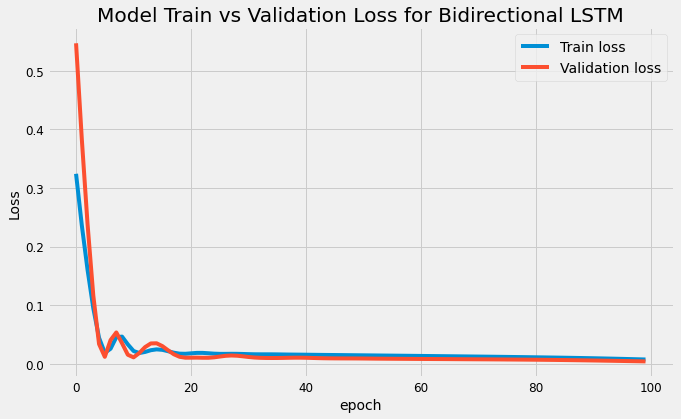

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

1/1 [==============================] - 2s 2s/step


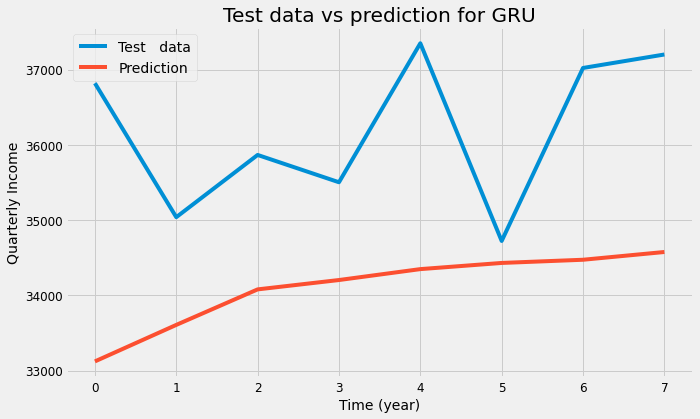

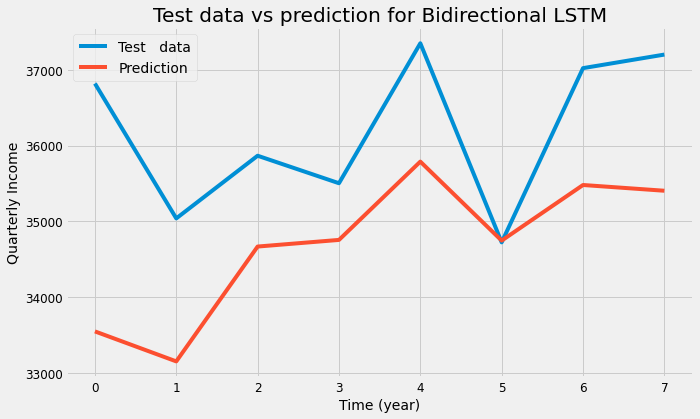

In [ ]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(scaler.inverse_transform(y_test)), 
             label='Test   data')
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction')
    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (year)')
    plt.ylabel('Quarterly Income')
 
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

In [ ]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_gru, scaler.inverse_transform(y_test), 'GRU')
evaluate_prediction(prediction_bilstm, scaler.inverse_transform(y_test), 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 2085.2383
Root Mean Square Error: 2320.4647

Bidirectional LSTM:
Mean Absolute Error: 1503.6255
Root Mean Square Error: 1743.0772



In [ ]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(scaler.transform(prediction_gru), y_test, 'GRU')
evaluate_prediction(scaler.transform(prediction_bilstm), y_test, 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 0.2079
Root Mean Square Error: 0.2313

Bidirectional LSTM:
Mean Absolute Error: 0.1499
Root Mean Square Error: 0.1738



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
